# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (File -> Download as -> PDF via LaTeX). You should then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [1]:
import tensorflow as tf
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , BatchNormalization , Dropout ,Flatten
from tensorflow.keras import Sequential
import pandas as pd
%matplotlib inline

![SVHN overview image](data/svhn_examples.jpg)
For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an  image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images. 

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [2]:
test = loadmat('/kaggle/input/test_32x32.mat')
train = loadmat('/kaggle/input/train_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [3]:
train_x , train_y = train['X'] , train['y']
test_x , test_y = test['X'] ,test['y']

In [4]:
train_y[train_y == 10] = 0
test_y[test_y == 10] = 0

In [5]:
train_x.shape

(32, 32, 3, 73257)

## Shape of training examples arenot the way that is usually dealt with so I used np.transpose to permutate the axis

In [6]:
train_x = np.transpose(train_x,(3 ,0 ,1,2))
test_x = np.transpose(test_x,(3 ,0 ,1,2))

print("Train x shape : {}\nTest x shape : {}".format(train_x.shape,test_x.shape))

Train x shape : (73257, 32, 32, 3)
Test x shape : (26032, 32, 32, 3)


In [7]:
train_x = train_x / 255
test_x = test_x / 255

In [8]:
def show_pictures_colored(indices,tset,tlabel):
    
    fig , axlist = plt.subplots(ncols = 5 , nrows = 2 )
    
    for ind , pind in enumerate(indices):
        
        axlist.ravel()[ind].set_axis_off()
        axlist.ravel()[ind].set_title('{}'.format(tlabel[pind]))
        axlist.ravel()[ind].imshow(tset[pind])
    fig.tight_layout()

def show_pictures_grey(indices,tset,tlabel):
    
    fig , axlist = plt.subplots(ncols = 5 , nrows = 2 )
    
    for ind , pind in enumerate(indices):
        
        axlist.ravel()[ind].set_axis_off()
        axlist.ravel()[ind].set_title('{}'.format(tlabel[pind]))
        axlist.ravel()[ind].imshow(tset[pind,:,:,0])
    fig.tight_layout()


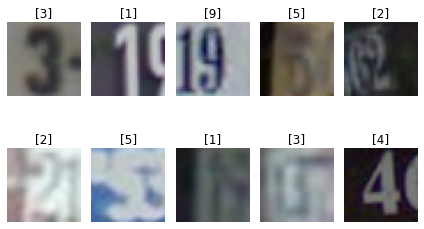

In [9]:
indices = list(np.random.randint(1,train_x.shape[0],size=(10,)) )
show_pictures_colored(indices,train_x,train_y)

In [10]:
train_x_grey = np.mean(train_x,keepdims=True,axis = -1)
test_x_grey = np.mean(test_x,keepdims=True,axis = -1)
train_x_grey.shape

(73257, 32, 32, 1)

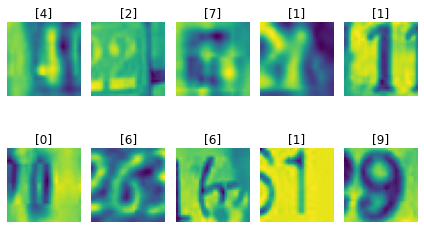

In [11]:
indices = list(np.random.randint(1,train_x.shape[0],size=(10,)) )
show_pictures_grey(indices , train_x_grey , train_y)

In [12]:
from sklearn.model_selection import train_test_split

train_x , val_x , train_y , val_y = train_test_split(train_x_grey,train_y, test_size = 0.04 )

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [13]:
def get_model():
    model = Sequential([
        Flatten(input_shape=(32,32,1)),
        Dense(64,activation='relu'),
        Dense(64,activation='relu'),
        Dense(64,activation='relu'),
        Dense(10,activation="softmax")
        
    ])
    return model

In [14]:
model = get_model()

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                65600     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 74,570
Trainable params: 74,570
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])

## Callbacks : save best and reducelr on plateau

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint , ReduceLROnPlateau

callback_best = ModelCheckpoint('model/best_model' , save_best_only= True ,save_weights_only=True , monitor="val_accuracy" )
reduceLRplat = ReduceLROnPlateau(monitor="val_loss",patience=5)

In [18]:
from keras.utils.np_utils import to_categorical

train_y_cat = to_categorical(train_y,10)

val_y_cat = to_categorical(val_y,10)

In [19]:
history = model.fit(train_x,train_y_cat,validation_data=(val_x,val_y_cat) , verbose = 2 ,
                    epochs=20 , batch_size= 128 ,callbacks=[callback_best , reduceLRplat])

Epoch 1/20
550/550 - 2s - loss: 2.1736 - accuracy: 0.2158 - val_loss: 1.7903 - val_accuracy: 0.3702 - lr: 0.0010
Epoch 2/20
550/550 - 1s - loss: 1.5525 - accuracy: 0.4665 - val_loss: 1.4718 - val_accuracy: 0.4995 - lr: 0.0010
Epoch 3/20
550/550 - 1s - loss: 1.4036 - accuracy: 0.5255 - val_loss: 1.4178 - val_accuracy: 0.5251 - lr: 0.0010
Epoch 4/20
550/550 - 1s - loss: 1.3139 - accuracy: 0.5669 - val_loss: 1.2846 - val_accuracy: 0.5821 - lr: 0.0010
Epoch 5/20
550/550 - 2s - loss: 1.2291 - accuracy: 0.6028 - val_loss: 1.2698 - val_accuracy: 0.5926 - lr: 0.0010
Epoch 6/20
550/550 - 1s - loss: 1.1773 - accuracy: 0.6235 - val_loss: 1.2026 - val_accuracy: 0.6104 - lr: 0.0010
Epoch 7/20
550/550 - 1s - loss: 1.1376 - accuracy: 0.6388 - val_loss: 1.1516 - val_accuracy: 0.6370 - lr: 0.0010
Epoch 8/20
550/550 - 1s - loss: 1.0961 - accuracy: 0.6518 - val_loss: 1.1069 - val_accuracy: 0.6588 - lr: 0.0010
Epoch 9/20
550/550 - 1s - loss: 1.0665 - accuracy: 0.6618 - val_loss: 1.1056 - val_accuracy: 0.6

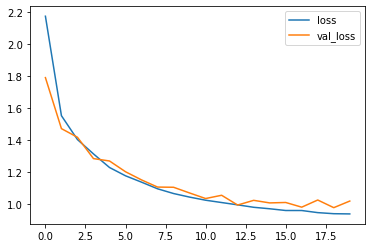

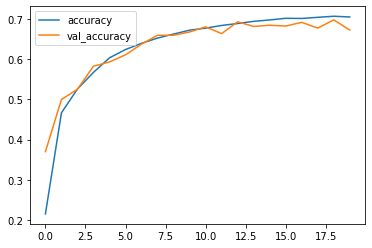

In [20]:
df = pd.DataFrame(history.history)
df.plot(y= ["loss","val_loss"],use_index = True)
df.plot(y= [ "accuracy","val_accuracy"] , use_index = True)

In [21]:
model.evaluate(test_x_grey,to_categorical(test_y,10))

814/814 [==============================] - 1s 1ms/step - loss: 1.0939 - accuracy: 0.6618


[1.0938632488250732, 0.6617624759674072]

## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [22]:
def get_cnn_model():
    model = Sequential([
        
        Conv2D(6,5,input_shape=(32,32,1)),
        BatchNormalization(),
        MaxPooling2D(2,strides = 2),
         
        Dropout(0.3), 
        
        Conv2D(16,5),
        BatchNormalization(),
        MaxPooling2D(2),
        
        Dropout(0.3), 
        
        Flatten(),
        
        Dense(120,activation = 'relu'),
        Dense(84,activation = 'relu'),
        
        Dense(10,activation= 'softmax')       
        
    ])
    
    return model

In [23]:
model_cnn = get_cnn_model()

In [24]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 6)         24        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)         

In [25]:
model_cnn.compile(loss = "categorical_crossentropy" , optimizer = 'adam' , metrics = ['accuracy'])

In [26]:
from tensorflow.keras.callbacks import CSVLogger
callback_best_cnn = ModelCheckpoint('model_cnn/best_model' ,save_best_only=True ,  save_weights_only=True , monitor="val_accuracy" )
csvlogger = CSVLogger('model_cnn.csv')


In [27]:
history_cnn = model_cnn.fit(train_x,train_y_cat,validation_data=(val_x,val_y_cat) ,verbose = 2 ,
                            epochs=20 , batch_size= 128 ,callbacks=[callback_best_cnn , csvlogger])

Epoch 1/20
550/550 - 32s - loss: 1.2829 - accuracy: 0.5777 - val_loss: 0.7435 - val_accuracy: 0.7823
Epoch 2/20
550/550 - 32s - loss: 0.7132 - accuracy: 0.7850 - val_loss: 0.5536 - val_accuracy: 0.8356
Epoch 3/20
550/550 - 32s - loss: 0.6121 - accuracy: 0.8159 - val_loss: 0.4938 - val_accuracy: 0.8509
Epoch 4/20
550/550 - 32s - loss: 0.5615 - accuracy: 0.8308 - val_loss: 0.4614 - val_accuracy: 0.8646
Epoch 5/20
550/550 - 32s - loss: 0.5271 - accuracy: 0.8396 - val_loss: 0.4389 - val_accuracy: 0.8676
Epoch 6/20
550/550 - 31s - loss: 0.5031 - accuracy: 0.8467 - val_loss: 0.4270 - val_accuracy: 0.8700
Epoch 7/20
550/550 - 32s - loss: 0.4842 - accuracy: 0.8513 - val_loss: 0.4373 - val_accuracy: 0.8676
Epoch 8/20
550/550 - 32s - loss: 0.4732 - accuracy: 0.8555 - val_loss: 0.4100 - val_accuracy: 0.8820
Epoch 9/20
550/550 - 32s - loss: 0.4570 - accuracy: 0.8603 - val_loss: 0.3890 - val_accuracy: 0.8843
Epoch 10/20
550/550 - 32s - loss: 0.4422 - accuracy: 0.8634 - val_loss: 0.3880 - val_accura

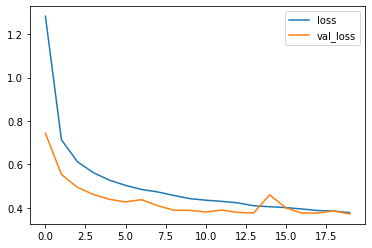

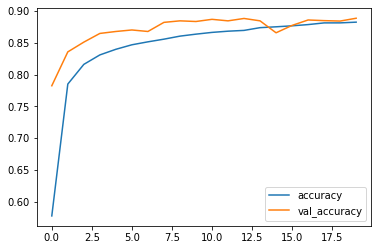

In [28]:
df_cnn = pd.DataFrame(history_cnn.history)
df_cnn.plot(y= ["loss","val_loss"],use_index = True)
df_cnn.plot(y= [ "accuracy","val_accuracy"] , use_index = True)

In [29]:
model_cnn.evaluate(test_x_grey,to_categorical(test_y,10))

814/814 [==============================] - 5s 6ms/step - loss: 0.4362 - accuracy: 0.8767


[0.43621304631233215, 0.8766518235206604]

## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [30]:
best_mlp = get_model()
best_mlp.load_weights('model/best_model')

In [31]:
best_cnn = get_cnn_model()
best_cnn.load_weights('model_cnn/best_model')

In [32]:
def show_pictures_withpred(indices,tset,tlabel,model):
    
    fig , axlist = plt.subplots(ncols = 2, nrows = 5,figsize = (15,7))
    
    for ind  in range(0,len(indices)*2-1,2):
        pind = int(ind/2)
        im = tset[pind]
        distrib = model.predict(im[np.newaxis,...])
        distrib = np.reshape(distrib,(10,))
        pred = np.argmax(distrib)
        if(pred == 0):  pred = 10 
        label = tlabel[pind]
        if(label == 0) : label = 10
        axlist.ravel()[ind].set_axis_off()
        axlist.ravel()[ind].set_title('Label : {} , Pred : {}'.format(label, pred))
        axlist.ravel()[ind].imshow(tset[pind,:,:,0])
        axlist.ravel()[ind + 1].bar(np.arange(0,10) , height=distrib)
        
    fig.tight_layout()

# For simplicity on graph the probability of 0 is the probability of 10

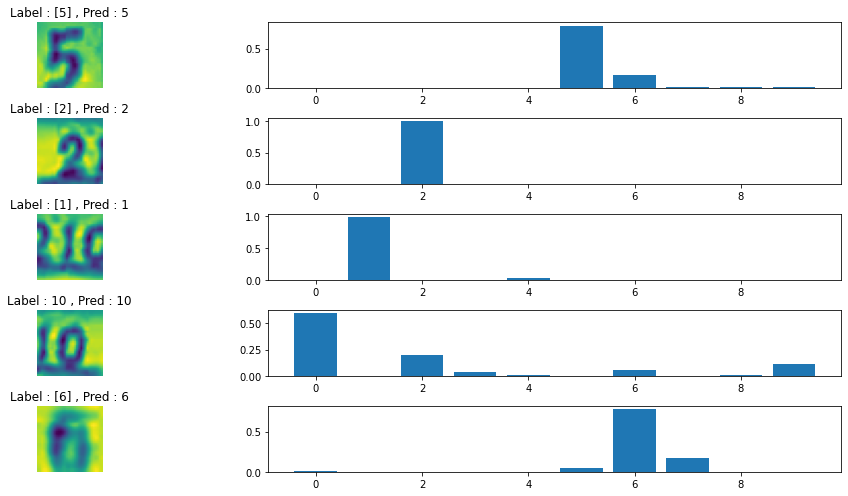

In [33]:
indices = np.random.randint(1,test_x_grey.shape[0],(5,))
show_pictures_withpred(indices,test_x_grey,test_y,best_cnn)


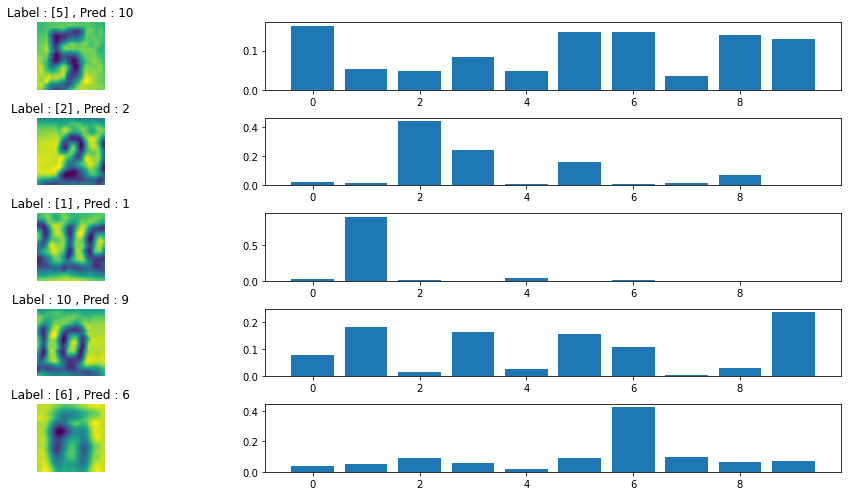

In [34]:
show_pictures_withpred(indices,test_x_grey,test_y,best_mlp)

In [35]:
best_cnn.compile(loss = 'categorical_crossentropy',optimizer='adam' , metrics = ['accuracy'])
best_mlp.compile(loss = 'categorical_crossentropy',optimizer='adam' , metrics = ['accuracy'])

In [36]:
test_y_cat = to_categorical(test_y,10)
_ , cnn_acc = best_cnn.evaluate(test_x_grey,test_y_cat)
_ , mlp_acc = best_mlp.evaluate(test_x_grey,test_y_cat)

814/814 [==============================] - 1s 1ms/step - loss: 1.0473 - accuracy: 0.6779


In [37]:
print('Best Accuracy on mlp : {}\nBest Accuracy on cnn : {}'.format(mlp_acc,cnn_acc))

Best Accuracy on mlp : 0.6778964400291443
Best Accuracy on cnn : 0.8766518235206604


In [38]:
!jupyter nbconvert --execute --to pdf __notebook_source__.ipynb

[NbConvertApp] WARNING | pattern '__notebook_source__.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--stdout
    Write notebook output 